# Traffic Data Analysis _ 2

In [235]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster, FastMarkerCluster
from folium import Choropleth, CircleMarker
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [166]:
# Downlaod Dataset from https://gis-txdot.opendata.arcgis.com/search?collection=Dataset

In [167]:
# Load the data
df = pd.read_csv('/Users/moni/Downloads/TxDOT_AADT_Annuals.csv')
df

,X,Y,OBJECTID,ID,DIST_NM,CNTY_NM,T_FLAG,AADT_2022,AADT_2021,AADT_2020,...,AADT_2007,AADT_2006,AADT_2005,AADT_2004,AADT_2003,ZLEVEL,DIST_NBR,CNTY_NBR,MAP_LBL,ON_ROAD
0,-106.143404,31.437593,1,4913.0,El Paso,El Paso,72H206T,154.0,154.0,197.0,...,2200.0,2400.0,2620.0,2700.0,2600.0,13.0,24.0,72.0,154,Tornillo Guadalupe Rd
1,-106.139529,31.443774,2,4921.0,El Paso,El Paso,72H208,657.0,612.0,466.0,...,1250.0,1400.0,1380.0,1650.0,1550.0,12.0,24.0,72.0,657,FM0076
2,-106.136073,31.441858,3,4929.0,El Paso,El Paso,72SP398,2267.0,2267.0,1725.0,...,0.0,0.0,0.0,0.0,0.0,13.0,24.0,72.0,"2,267",COUNTY ROAD 7206
3,-106.134150,31.445800,4,4937.0,El Paso,El Paso,72H224,1916.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,24.0,72.0,"1,916",M. F. Aguilera Rd
4,-106.098185,31.452735,5,4945.0,El Paso,El Paso,72H203,4670.0,4581.0,4886.0,...,4400.0,4200.0,4240.0,4800.0,4700.0,11.0,24.0,72.0,"4,670",SH0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40480,-94.694221,33.681101,40482,329225.0,Atlanta,Bowie,19H173,2771.0,3069.0,2959.0,...,2500.0,2900.0,2650.0,2500.0,2500.0,10.0,19.0,19.0,"2,771",US0259
40481,-94.616538,33.625361,40483,329233.0,Atlanta,Bowie,19H175,115.0,97.0,87.0,...,110.0,170.0,250.0,300.0,270.0,10.0,19.0,19.0,115,FM2735
40482,-94.497009,33.592673,40484,329241.0,Atlanta,Bowie,19H179,167.0,131.0,131.0,...,160.0,150.0,160.0,180.0,200.0,10.0,19.0,19.0,167,FM0992
40483,-94.413337,33.568163,40485,329249.0,Atlanta,Bowie,19H4,2937.0,3166.0,3404.0,...,3400.0,3100.0,3190.0,3600.0,2900.0,11.0,19.0,19.0,"2,937",SH0008


In [168]:
# About the data
# Point layer of traffic stations for TxDOT owned and maintained roadways. The traffic stations at these locations collect Average 
# Annual Daily Traffic. Toll road traffic counts may be shown for context purposes and may not represent on system traffic.
# The traffic stations at these locations collect short-term traffic count data to produce Annual Average Daily Traffic (AADT). 
# Traffic counts are collected on an annual basis as a means of measuring the use of public roads in the state. 
# AADTs are calculated using a volume count, axle factor, and seasonal factor. 
# A general overview of the equation is AADT = axles * axle factor * seasonal factor. 
# The data is sourced from the Statewide Traffic Analysis and Reporting System (STARS II).

In [169]:
# Dataframe discription
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40485 entries, 0 to 40484
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          40484 non-null  float64
 1   Y          40484 non-null  float64
 2   OBJECTID   40485 non-null  int64  
 3   ID         40484 non-null  float64
 4   DIST_NM    40484 non-null  object 
 5   CNTY_NM    40484 non-null  object 
 6   T_FLAG     40484 non-null  object 
 7   AADT_2022  40484 non-null  float64
 8   AADT_2021  40484 non-null  float64
 9   AADT_2020  40484 non-null  float64
 10  AADT_2019  40484 non-null  float64
 11  AADT_2018  40484 non-null  float64
 12  AADT_2017  40484 non-null  float64
 13  AADT_2016  40484 non-null  float64
 14  AADT_2015  40484 non-null  float64
 15  AADT_2014  40484 non-null  float64
 16  AADT_2013  40484 non-null  float64
 17  AADT_2012  40484 non-null  float64
 18  AADT_2011  40484 non-null  float64
 19  AADT_2010  40484 non-null  float64
 20  AADT_2

## Data Cleaning

In [170]:
# First find out which unique valuese we have in Country, City and State
print('unique Country count: ',df['CNTY_NM'].nunique())
print('unique Region count: ',df['DIST_NM'].nunique())

unique Country count:  256
unique Region count:  25


In [171]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'DIST_NM', 'CNTY_NM', 'T_FLAG', 'AADT_2022',
       'AADT_2021', 'AADT_2020', 'AADT_2019', 'AADT_2018', 'AADT_2017',
       'AADT_2016', 'AADT_2015', 'AADT_2014', 'AADT_2013', 'AADT_2012',
       'AADT_2011', 'AADT_2010', 'AADT_2009', 'AADT_2008', 'AADT_2007',
       'AADT_2006', 'AADT_2005', 'AADT_2004', 'AADT_2003', 'ZLEVEL',
       'DIST_NBR', 'CNTY_NBR', 'MAP_LBL', 'ON_ROAD'],
      dtype='object')

In [172]:
# Delete unneccesary columns
df_texas = df.copy();
df_texas = df_texas.drop(columns=['OBJECTID', 'ID', 'T_FLAG', 'MAP_LBL'])

column_names = df_texas.columns.tolist()
print('total columns: ',len(column_names),'\n')

df_texas.head()

total columns:  28 



,X,Y,DIST_NM,CNTY_NM,AADT_2022,AADT_2021,AADT_2020,AADT_2019,AADT_2018,AADT_2017,...,AADT_2008,AADT_2007,AADT_2006,AADT_2005,AADT_2004,AADT_2003,ZLEVEL,DIST_NBR,CNTY_NBR,ON_ROAD
0,-106.143404,31.437593,El Paso,El Paso,154.0,154.0,197.0,155.0,234.0,1473.0,...,2200.0,2200.0,2400.0,2620.0,2700.0,2600.0,13.0,24.0,72.0,Tornillo Guadalupe Rd
1,-106.139529,31.443774,El Paso,El Paso,657.0,612.0,466.0,653.0,1097.0,399.0,...,1300.0,1250.0,1400.0,1380.0,1650.0,1550.0,12.0,24.0,72.0,FM0076
2,-106.136073,31.441858,El Paso,El Paso,2267.0,2267.0,1725.0,1873.0,1603.0,1450.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,24.0,72.0,COUNTY ROAD 7206
3,-106.134150,31.445800,El Paso,El Paso,1916.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,24.0,72.0,M. F. Aguilera Rd
4,-106.098185,31.452735,El Paso,El Paso,4670.0,4581.0,4886.0,5838.0,5461.0,5137.0,...,4200.0,4400.0,4200.0,4240.0,4800.0,4700.0,11.0,24.0,72.0,SH0020


In [173]:
# check the data types again
print(df_texas.dtypes)

X            float64
Y            float64
DIST_NM       object
CNTY_NM       object
AADT_2022    float64
AADT_2021    float64
AADT_2020    float64
AADT_2019    float64
AADT_2018    float64
AADT_2017    float64
AADT_2016    float64
AADT_2015    float64
AADT_2014    float64
AADT_2013    float64
AADT_2012    float64
AADT_2011    float64
AADT_2010    float64
AADT_2009    float64
AADT_2008    float64
AADT_2007    float64
AADT_2006    float64
AADT_2005    float64
AADT_2004    float64
AADT_2003    float64
ZLEVEL       float64
DIST_NBR     float64
CNTY_NBR     float64
ON_ROAD       object
dtype: object


In [174]:
# DIST_NM & CNTY_NM are strings

In [175]:
# Missing values
# check null values
df_texas_1 = df_texas.copy()
df_texas_1.isnull().sum()

X              1
Y              1
DIST_NM        1
CNTY_NM        1
AADT_2022      1
AADT_2021      1
AADT_2020      1
AADT_2019      1
AADT_2018      1
AADT_2017      1
AADT_2016      1
AADT_2015      1
AADT_2014      1
AADT_2013      1
AADT_2012      1
AADT_2011      1
AADT_2010      1
AADT_2009      1
AADT_2008      1
AADT_2007      1
AADT_2006      1
AADT_2005      1
AADT_2004      1
AADT_2003      1
ZLEVEL         1
DIST_NBR       1
CNTY_NBR       1
ON_ROAD      331
dtype: int64

In [176]:
# Missing values
# check \\N values
count_occurrences = df_texas_1.apply(lambda x: (x == '\\N').sum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(count_occurrences)


X            0
Y            0
DIST_NM      0
CNTY_NM      0
AADT_2022    0
AADT_2021    0
AADT_2020    0
AADT_2019    0
AADT_2018    0
AADT_2017    0
AADT_2016    0
AADT_2015    0
AADT_2014    0
AADT_2013    0
AADT_2012    0
AADT_2011    0
AADT_2010    0
AADT_2009    0
AADT_2008    0
AADT_2007    0
AADT_2006    0
AADT_2005    0
AADT_2004    0
AADT_2003    0
ZLEVEL       0
DIST_NBR     0
CNTY_NBR     0
ON_ROAD      0
dtype: int64


In [177]:
# Fill the missing values in on_road column with ffill method
# Sort the DataFrame based on 'X' and 'Y' to ensure forward fill works correctly
df_texas_1.sort_values(['X', 'Y'], inplace=True)
# Use forward fill to fill missing 'ON_ROAD' values based on existing values
df_texas_1['ON_ROAD'] = df_texas_1['ON_ROAD'].ffill()
# Display the DataFrame after filling missing values
print(df_texas_1)

                X          Y   DIST_NM  CNTY_NM  AADT_2022  AADT_2021  \
47    -106.682116  31.785592   El Paso  El Paso      846.0        0.0   
48    -106.681506  31.786943   El Paso  El Paso     3238.0        0.0   
65    -106.625971  31.863641   El Paso  El Paso     3004.0     2905.0   
66    -106.625903  31.877940   El Paso  El Paso     3923.0     4154.0   
67    -106.625826  31.882776   El Paso  El Paso     4136.0     4133.0   
...           ...        ...       ...      ...        ...        ...   
37226  -93.576026  31.161103  Beaumont   Newton      918.0      622.0   
37227  -93.567031  31.171233  Beaumont   Newton      104.0      134.0   
37228  -93.566123  31.178793  Beaumont   Newton      967.0      748.0   
37225  -93.524696  31.064099  Beaumont   Newton     1369.0     1301.0   
40484         NaN        NaN       NaN      NaN        NaN        NaN   

       AADT_2020  AADT_2019  AADT_2018  AADT_2017  ...  AADT_2008  AADT_2007  \
47           0.0        0.0        0.0     

In [178]:
df_texas_1.isnull().sum()

X            1
Y            1
DIST_NM      1
CNTY_NM      1
AADT_2022    1
AADT_2021    1
AADT_2020    1
AADT_2019    1
AADT_2018    1
AADT_2017    1
AADT_2016    1
AADT_2015    1
AADT_2014    1
AADT_2013    1
AADT_2012    1
AADT_2011    1
AADT_2010    1
AADT_2009    1
AADT_2008    1
AADT_2007    1
AADT_2006    1
AADT_2005    1
AADT_2004    1
AADT_2003    1
ZLEVEL       1
DIST_NBR     1
CNTY_NBR     1
ON_ROAD      2
dtype: int64

In [179]:
# Drop the missing values
# Drop rows with NaN values
df_cleaned = df_texas_1.dropna()

In [180]:
df_cleaned.isnull().sum()

X            0
Y            0
DIST_NM      0
CNTY_NM      0
AADT_2022    0
AADT_2021    0
AADT_2020    0
AADT_2019    0
AADT_2018    0
AADT_2017    0
AADT_2016    0
AADT_2015    0
AADT_2014    0
AADT_2013    0
AADT_2012    0
AADT_2011    0
AADT_2010    0
AADT_2009    0
AADT_2008    0
AADT_2007    0
AADT_2006    0
AADT_2005    0
AADT_2004    0
AADT_2003    0
ZLEVEL       0
DIST_NBR     0
CNTY_NBR     0
ON_ROAD      0
dtype: int64

## Analayzing

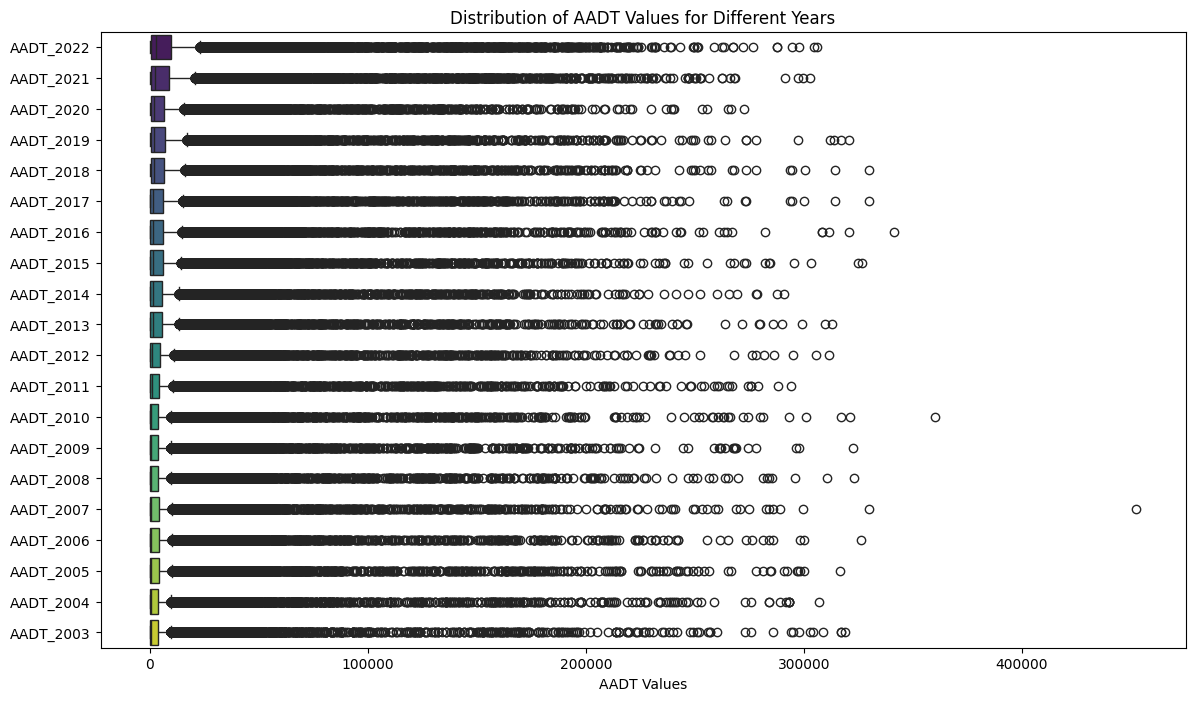

In [181]:
# Selecting the relevant columns for AADT values for different years
aadt_columns = ['AADT_2022', 'AADT_2021', 'AADT_2020', 'AADT_2019', 'AADT_2018', 'AADT_2017',
                'AADT_2016', 'AADT_2015', 'AADT_2014', 'AADT_2013', 'AADT_2012', 'AADT_2011',
                'AADT_2010', 'AADT_2009', 'AADT_2008', 'AADT_2007', 'AADT_2006', 'AADT_2005',
                'AADT_2004', 'AADT_2003']

# Subset the DataFrame to include only AADT columns
aadt_df = df_cleaned[aadt_columns]

# Create a boxplot for each year
plt.figure(figsize=(14, 8))
sns.boxplot(data=aadt_df, orient='h', palette='viridis')
plt.title('Distribution of AADT Values for Different Years')
plt.xlabel('AADT Values')
plt.show()

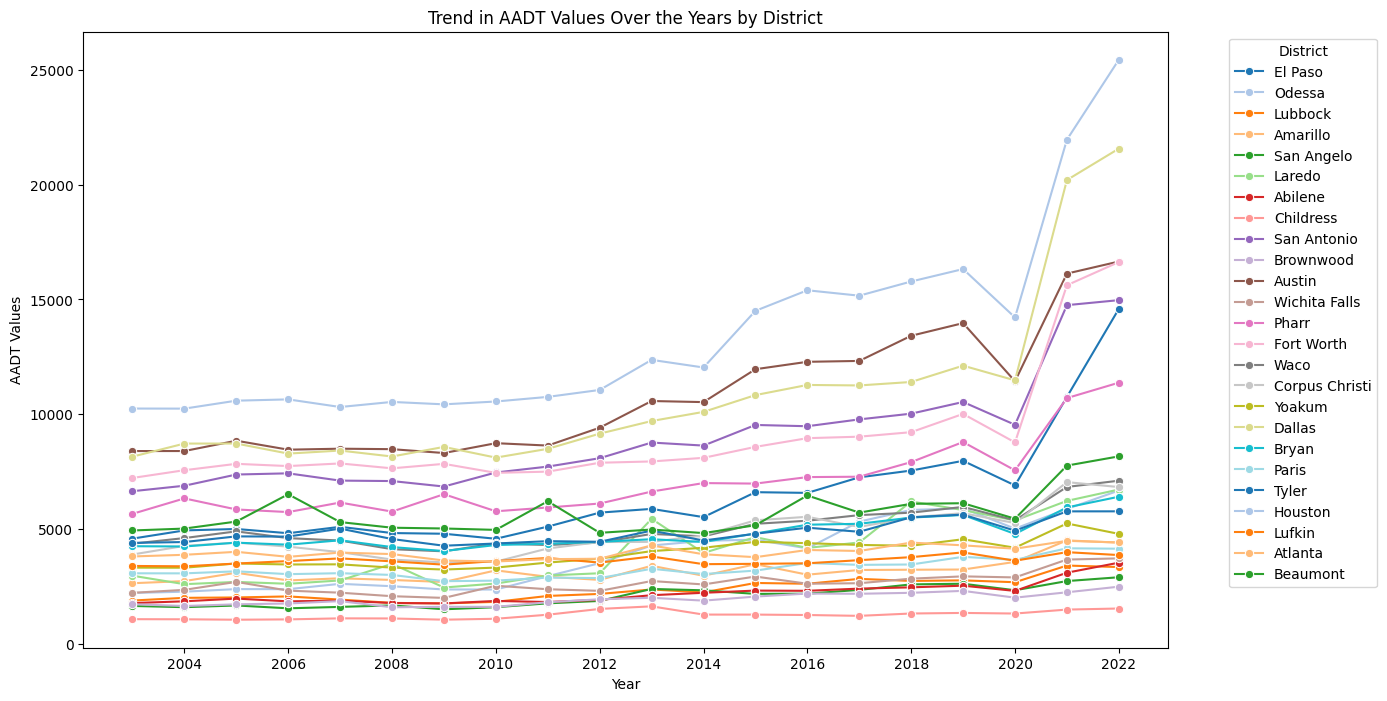

In [182]:
# Finding trend based on AASTs
# Selecting relevant columns
columns_of_interest = ['DIST_NM', 'AADT_2022', 'AADT_2021', 'AADT_2020', 'AADT_2019', 'AADT_2018', 'AADT_2017',
                        'AADT_2016', 'AADT_2015', 'AADT_2014', 'AADT_2013', 'AADT_2012', 'AADT_2011',
                        'AADT_2010', 'AADT_2009', 'AADT_2008', 'AADT_2007', 'AADT_2006', 'AADT_2005',
                        'AADT_2004', 'AADT_2003']

# Subset the DataFrame to include only relevant columns
df_trend = df_cleaned[columns_of_interest]

# Melt the DataFrame to long format for easy plotting
df_trend_long = df_trend.melt(id_vars=['DIST_NM'], var_name='Year', value_name='AADT')

# Convert 'Year' column to numeric for correct sorting
df_trend_long['Year'] = df_trend_long['Year'].str.extract('(\\d+)').astype(float)

# Create a custom color palette with more distinguishable colors
custom_palette = sns.color_palette("tab20", n_colors=len(df_trend['DIST_NM'].unique()))

# Set the custom color palette
sns.set_palette(custom_palette)

# Create line plot for each district
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_trend_long, x='Year', y='AADT', hue='DIST_NM', marker='o', ci=None)


# Adjust x-axis ticks to show every 2 years
plt.xticks(df_trend_long['Year'].unique()[::2])

# Move the legend to the upper-left corner
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('Trend in AADT Values Over the Years by District')
plt.xlabel('Year')
plt.ylabel('AADT Values')
plt.show()

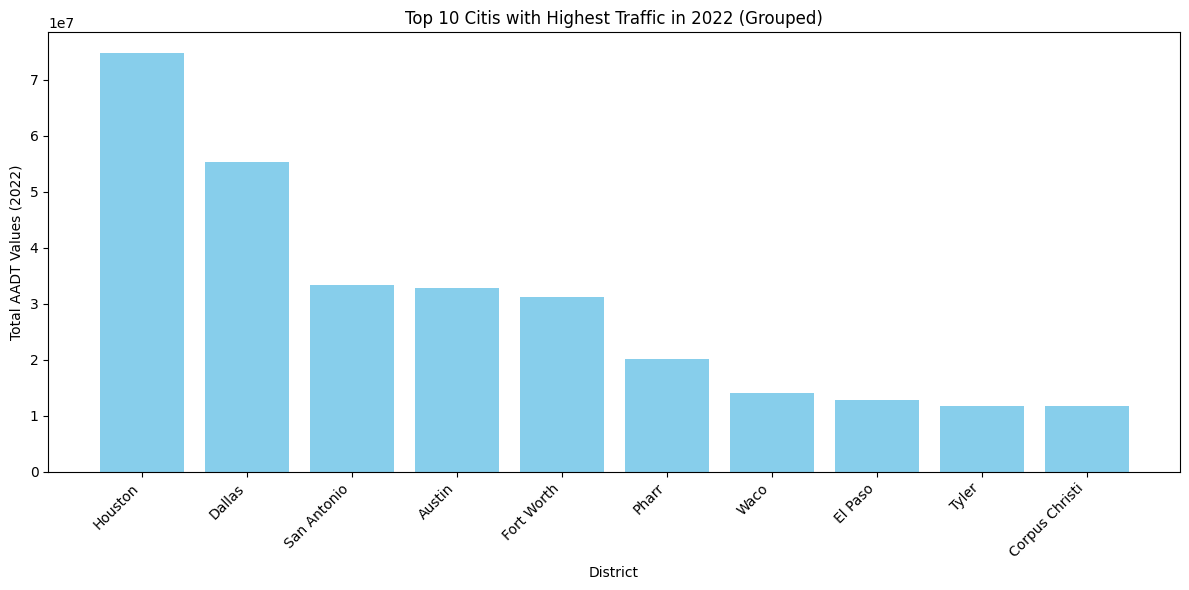

In [233]:
# Top 10 Districts with the most traffic in 2022
# Select relevant columns
columns_of_interest = ['DIST_NM', 'AADT_2022']

# Subset the DataFrame to include only relevant columns
df_traffic_2022 = df_cleaned[columns_of_interest]

# Group by 'DIST_NM' and sum the 'AADT_2022' values
df_grouped = df_traffic_2022.groupby('DIST_NM')['AADT_2022'].sum().reset_index()

# Sort the grouped DataFrame by the sum of 'AADT_2022' in descending order
df_grouped_sorted = df_grouped.sort_values(by='AADT_2022', ascending=False)

# Select the top 10 districts
top_10_districts_2022 = df_grouped_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_districts_2022['DIST_NM'], top_10_districts_2022['AADT_2022'], color='skyblue')
plt.xlabel('District')
plt.ylabel('Total AADT Values (2022)')
plt.title('Top 10 Citis with Highest Traffic in 2022 (Grouped)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


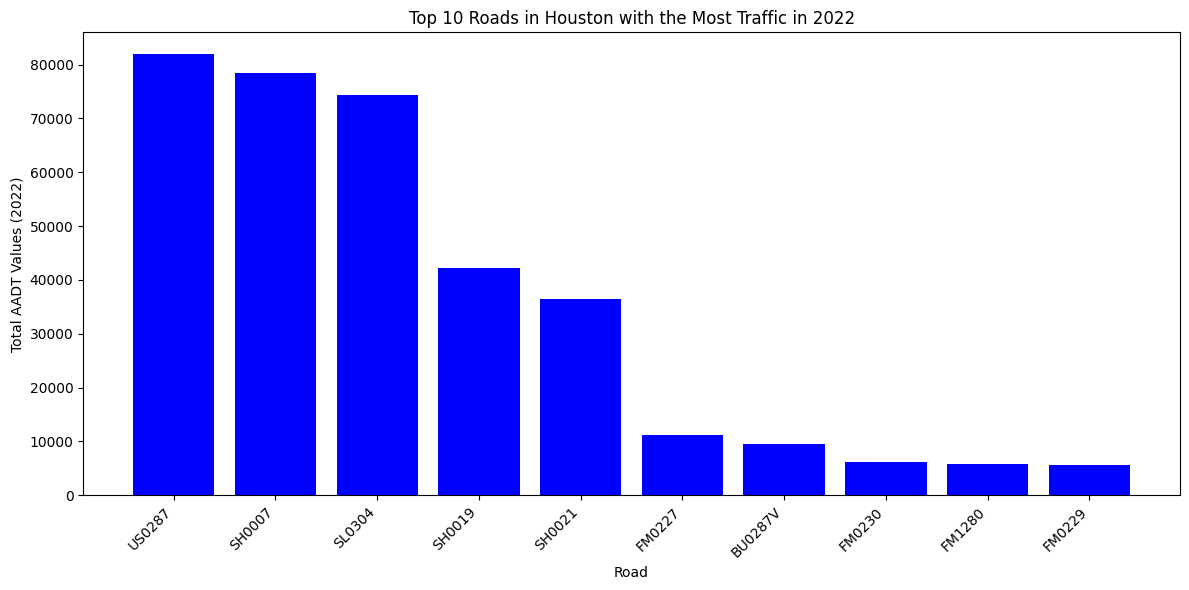

In [228]:
# TOP 10 Roads with most traffic amount in 2022
# Filter data for Houston
df_houston = df_cleaned[df_cleaned['CNTY_NM'] == 'Houston']

# Select relevant columns
columns_of_interest = ['ON_ROAD', 'AADT_2022']

# Subset the DataFrame to include only relevant columns
df_traffic_houston_2022 = df_houston[columns_of_interest]

# Group by 'ON_ROAD' and sum the 'AADT_2022' values
df_traffic_houston_2022_grouped = df_houston.groupby('ON_ROAD')['AADT_2022'].sum().reset_index()

# Sort the grouped DataFrame by the sum of 'AADT_2022' in descending order
df_traffic_houston_2022_sorted = df_traffic_houston_2022_grouped.sort_values(by='AADT_2022', ascending=False)

# Select the top 10 roads
top_10_roads_houston_2022 = df_traffic_houston_2022_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_roads_houston_2022['ON_ROAD'], top_10_roads_houston_2022['AADT_2022'], color='blue')
plt.xlabel('Road')
plt.ylabel('Total AADT Values (2022)')
plt.title('Top 10 Roads in Houston with the Most Traffic in 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [210]:
# Predicting the Traffic for Houston for the year 2023

# Filter data for Houston
df_houston = df_cleaned[df_cleaned['CNTY_NM'] == 'Houston']  # Assuming 'CNTY_NM' contains county names

# Selecting relevant columns
traffic_columns = ['AADT_2003', 'AADT_2004', 'AADT_2005', 'AADT_2006', 'AADT_2007',
                   'AADT_2008', 'AADT_2009', 'AADT_2010', 'AADT_2011', 'AADT_2012',
                   'AADT_2013', 'AADT_2014', 'AADT_2015', 'AADT_2016', 'AADT_2017',
                   'AADT_2018', 'AADT_2019', 'AADT_2020', 'AADT_2021', 'AADT_2022']

df_houston = df_houston[['X', 'Y'] + traffic_columns]

# Drop missing values
df_houston = df_houston.dropna()

# Prepare features and target
X = df_houston.drop(['X', 'Y'], axis=1)  # Use traffic amounts from 2003 to 2022 as features
y = df_houston['AADT_2022']  # Predicting traffic amount for 2022

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and linear regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('regressor', LinearRegression())
])

# Train the linear regression model using the pipeline
pipeline.fit(X_train, y_train)

# Predict traffic amounts for 2023
future_years = [2023]
future_data = pd.DataFrame(index=future_years)

# Add time features (years) for the future years
X_future = pd.DataFrame(index=future_data.index, columns=X_train.columns)

# Predict traffic amounts for 2023 and 202
future_data['Predicted_Traffic'] = pipeline.predict(X_future)

# Display predictions for 2023
print(future_data)


      Predicted_Traffic
2023        1794.289655


In [194]:
# Interactive map

# Sample a subset of data for faster plotting 
# df_sample = df_cleaned.sample(n=5000, random_state=42)
df_sample = df_cleaned.copy()
# Create a base map
map_traffic = folium.Map(location=[29.7604, -95.3698], zoom_start=10)  # Houston's approximate center

# Create a MarkerCluster to add markers efficiently
marker_cluster = MarkerCluster().add_to(map_traffic)

# Add CircleMarkers for each data point in the sample
for index, row in df_sample.iterrows():
    popup_content = f"Road: {row['DIST_NM']}<br>Traffic: {row['AADT_2022']}<br>Location: ({row['X']}, {row['Y']})"
    
    # Determine color based on traffic amount (you can customize the color scale)
    color = 'red' if row['AADT_2022'] > 1000 else 'green'
    
    CircleMarker(
        location=[row['Y'], row['X']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=popup_content
    ).add_to(marker_cluster)

# Save the map
map_traffic.save('houstonTexas_traffic_map_choropleth.html')


In [195]:
!open houstonTexas_traffic_map_choropleth.html